In [48]:
import pandas as pd

data=pd.read_csv("MeMas_5min.csv",header=0,infer_datetime_format=True,parse_dates=['Data'],index_col=['Data'])
hourly_data=data.resample('H').sum()

In [49]:
dataset2 = hourly_data.truncate('2019-09-02','2019-10-07')
train_index1 = int(round(dataset2.size*(672/841)))
eval_index1 = int(round(dataset2.size*(169/841)))
# dataset_train = dataset2.truncate('2019-09-02','2019-09-30')
# dataset_eval = dataset2.truncate('2019-09-30','2019-10-07')
dataset2

,Ativa
Data,
2019-09-02 00:00:00,576.72
2019-09-02 01:00:00,581.04
2019-09-02 02:00:00,576.00
2019-09-02 03:00:00,579.60
2019-09-02 04:00:00,572.40
...,...
2019-10-06 20:00:00,578.16
2019-10-06 21:00:00,576.72
2019-10-06 22:00:00,574.56


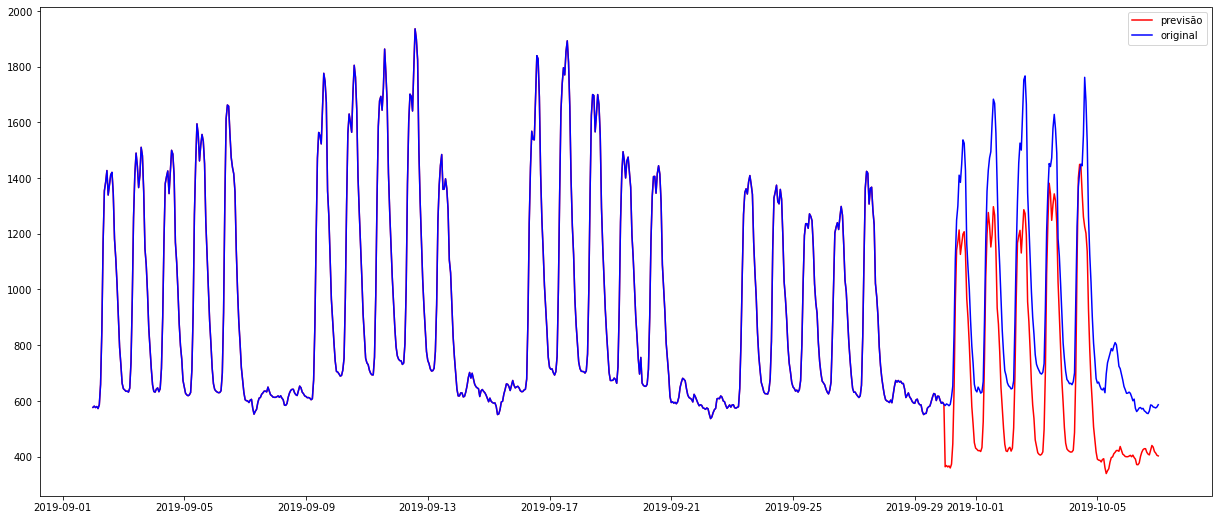

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
    
def fourierExtrapolation(x, n_predict, n_harm):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
x =dataset2['Ativa'][0:train_index1].to_numpy()
n_predict = eval_index1
extrapolation = fourierExtrapolation(x, n_predict, 1100)
plt.figure(figsize=(21,9))
plt.plot(dataset2.index, extrapolation, 'r', label = 'previsão')
plt.plot(dataset2.index, dataset2, 'b', label = 'original')
plt.legend()
plt.show()

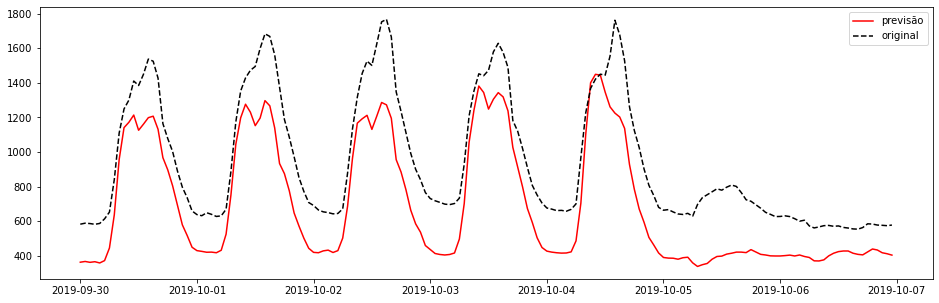

In [51]:
plt.figure(figsize=(16,5))
plt.plot(dataset2.index[-eval_index1:-1], extrapolation[-eval_index1:-1], 'r', label = 'previsão')
plt.plot(dataset2.index[-eval_index1:-1], dataset2[-eval_index1:-1],'k--', label = 'original')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(dataset2,extrapolation)
mse

14328.65140579589

In [53]:
n_harm_test = [50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000,1500,2000,3000,4000,5000,10000,50000,100000]
import numpy as np
for a in n_harm_test:
    extrapolation = fourierExtrapolation(x, n_predict, a)
    mse = mean_squared_error(dataset2,extrapolation)
    print(a, '          ',np.sqrt(mse))

50            138.69294382770613
100            127.04426214357485
150            120.31784294708098
200            120.1774043226569
250            120.05413463687277
300            119.77027332146527
350            119.70234503047921
400            119.70234503047921
450            119.70234503047921
500            119.70234503047921
600            119.70234503047921
700            119.70234503047921
800            119.70234503047921
900            119.70234503047921
1000            119.70234503047921
1500            119.70234503047921
2000            119.70234503047921
3000            119.70234503047921
4000            119.70234503047921
5000            119.70234503047921
10000            119.70234503047921
50000            119.70234503047921
100000            119.70234503047921
